In [2]:
import tensorflow as tf
import numpy as np
import os
from __future__ import print_function
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = ''

/home/arg_ws3/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [6]:
# Make up some real data
x_data = np.linspace(-1,1,20)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.square(ys - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [14]:
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

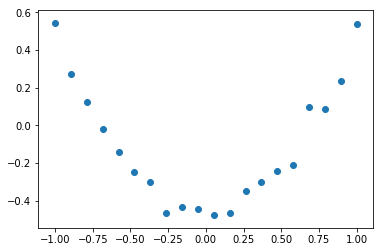

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

In [19]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        try:
            plt.pause(0.5)
        except Exception:
            pass
        try:
            ax.lines.remove(lines[0])
            plt.show()
        except Exception as e:
            pass
            #print (str(e))
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)

0.062417977
0.0062853144
0.0048571364
0.0043110675
0.0038309083
0.0035833344
0.0034651258
0.0033934233
0.003239204
0.003083576
0.002981625
0.0029109905
0.002858196
0.0028168813
0.0027820882
0.0027482773
0.0027188417
0.0026920405
0.0026672701
0.0026440967


In [15]:
'''losses = []
for i in xrange(100):
    _, current_loss = sess.run([train_step, loss], feed_dict={xs: x_data, ys: y_data})
    losses.append(current_loss)
plt.plot(losses)
plt.show()'''

'losses = []\nfor i in xrange(100):\n    _, current_loss = sess.run([train_step, loss], feed_dict={xs: x_data, ys: y_data})\n    losses.append(current_loss)\nplt.plot(losses)\nplt.show()'